In [ ]:
# https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification

In [2]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

print(os.listdir("input/train"))

['cat.10001.jpg', 'cat.10002.jpg', 'cat.10005.jpg', 'cat.10008.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10029.jpg', 'cat.1004.jpg', 'cat.10050.jpg', 'cat.10053.jpg', 'cat.10059.jpg', 'cat.1006.jpg', 'cat.10065.jpg', 'cat.10066.jpg', 'cat.10069.jpg', 'cat.1007.jpg', 'cat.10077.jpg', 'cat.10078.jpg', 'cat.1008.jpg', 'cat.10098.jpg', 'cat.10102.jpg', 'cat.10105.jpg', 'cat.10107.jpg', 'cat.10108.jpg', 'cat.10109.jpg', 'cat.10111.jpg', 'cat.10121.jpg', 'cat.10125.jpg', 'cat.1014.jpg', 'cat.10154.jpg', 'cat.10156.jpg', 'cat.1016.jpg', 'cat.10161.jpg', 'cat.10164.jpg', 'cat.10168.jpg', 'cat.10176.jpg', 'cat.1018.jpg', 'cat.10181.jpg', 'cat.10182.jpg', 'cat.10184.jpg', 'cat.10194.jpg', 'cat.10197.jpg', 'cat.10198.jpg', 'cat.10201.jpg', 'cat.10202.jpg', 'cat.10203.jpg', 'cat.10205.jpg', 'cat.10210.jpg', 'cat.10220.jpg', 'cat.10226.jpg', 'cat.10229.jpg', 'cat.10237.jpg', 'cat.10244.jpg', 'cat.10248.jpg', 'cat.1025.jpg', 'cat.10254.jpg', 'cat.10255.jpg', 'cat.10257.jpg', 'cat.10259.jpg', 'cat

In [3]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [4]:
filenames = os.listdir("input/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [5]:
df.head()


,filename,category
0,cat.10001.jpg,0
1,cat.10002.jpg,0
2,cat.10005.jpg,0
3,cat.10008.jpg,0
4,cat.10024.jpg,0


In [6]:
df.tail()

,filename,category
3995,dog.9972.jpg,1
3996,dog.9974.jpg,1
3997,dog.9979.jpg,1
3998,dog.9982.jpg,1
3999,dog.9985.jpg,1


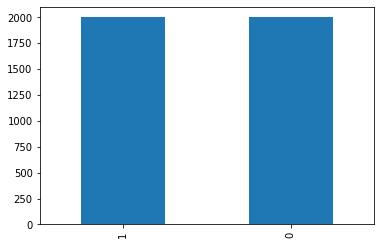

In [7]:
df['category'].value_counts().plot.bar()

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

W0813 10:39:14.109663  7496 deprecation_wrapper.py:119] From C:\Users\KCB-SA\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:514: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 10:39:14.112628  7496 deprecation_wrapper.py:119] From C:\Users\KCB-SA\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4076: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 10:39:14.137592  7496 deprecation_wrapper.py:119] From C:\Users\KCB-SA\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:171: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0813 10:39:14.137592  7496 deprecation_wrapper.py:119] From C:\Users\KCB-SA\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:178: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0813 10:39:14.167507  7496 deprecation_wrapper.py:119] From C:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
__________

In [9]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

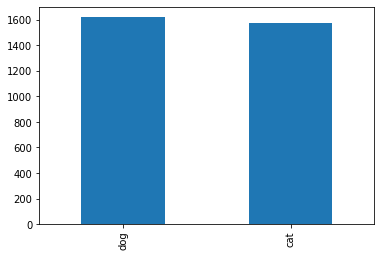

In [10]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()

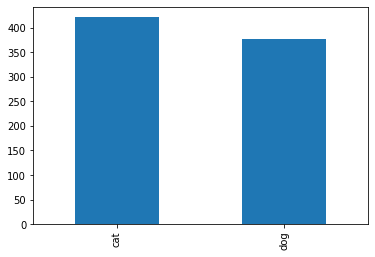

In [11]:
validate_df['category'].value_counts().plot.bar()

In [12]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [13]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "input/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 3200 validated image filenames belonging to 2 classes.


In [14]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "D101/data/kaggle_dogcat/train/all", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 0 validated image filenames belonging to 0 classes.


C:\Users\KCB-SA\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:273: UserWarning: Found 800 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [15]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "D101/data/kaggle_dogcat/train/all", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 0 validated image filenames belonging to 0 classes.


C:\Users\KCB-SA\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


IndexError: index 0 is out of bounds for axis 0 with size 0

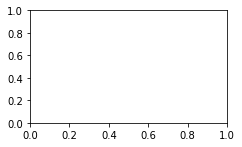

In [16]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [17]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

W0813 10:39:50.074478  7496 deprecation.py:323] From C:\Users\KCB-SA\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
213/213 [==============================] - 245s 1s/step - loss: 1.1339 - acc: 0.5631
Epoch 2/50


C:\Users\KCB-SA\Anaconda3\lib\site-packages\keras\callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
C:\Users\KCB-SA\Anaconda3\lib\site-packages\keras\callbacks.py:1043: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


213/213 [==============================] - 269s 1s/step - loss: 0.7809 - acc: 0.5978
Epoch 3/50
213/213 [==============================] - 285s 1s/step - loss: 0.7054 - acc: 0.6178
Epoch 4/50
213/213 [==============================] - 257s 1s/step - loss: 0.6574 - acc: 0.6382
Epoch 5/50
213/213 [==============================] - 255s 1s/step - loss: 0.6266 - acc: 0.6545
Epoch 6/50
213/213 [==============================] - 224s 1s/step - loss: 0.6032 - acc: 0.6773
Epoch 7/50
213/213 [==============================] - 282s 1s/step - loss: 0.5996 - acc: 0.6773
Epoch 8/50
213/213 [==============================] - 281s 1s/step - loss: 0.5841 - acc: 0.6967
Epoch 9/50
213/213 [==============================] - 276s 1s/step - loss: 0.5692 - acc: 0.7124
Epoch 10/50
213/213 [==============================] - 284s 1s/step - loss: 0.5609 - acc: 0.7070
Epoch 11/50
213/213 [==============================] - 234s 1s/step - loss: 0.5457 - acc: 0.7274
Epoch 12/50
213/213 [============================

In [19]:
model.save_weights("model.h5")

KeyError: 'val_loss'

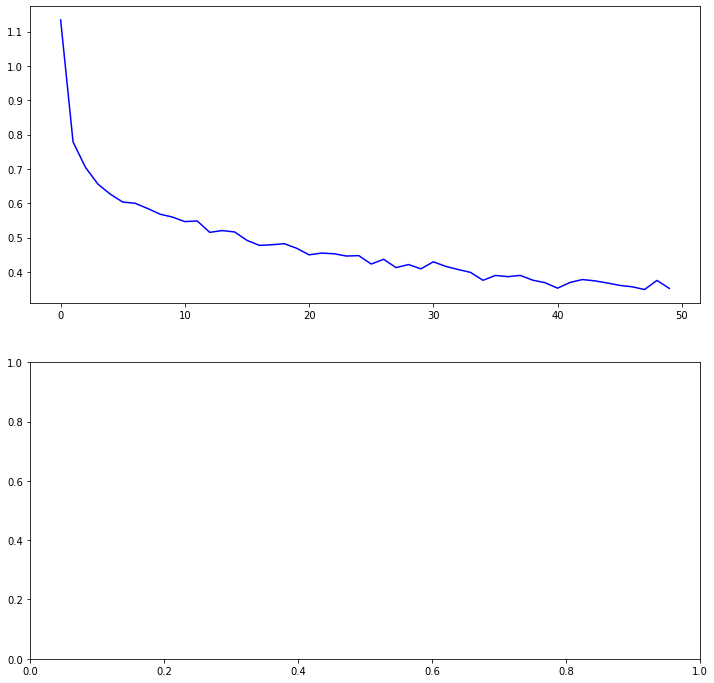

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [21]:
test_filenames = os.listdir("input/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [22]:

test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "input/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 400 validated image filenames.


In [23]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

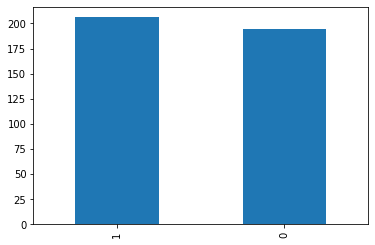

In [24]:
test_df['category'].value_counts().plot.bar()

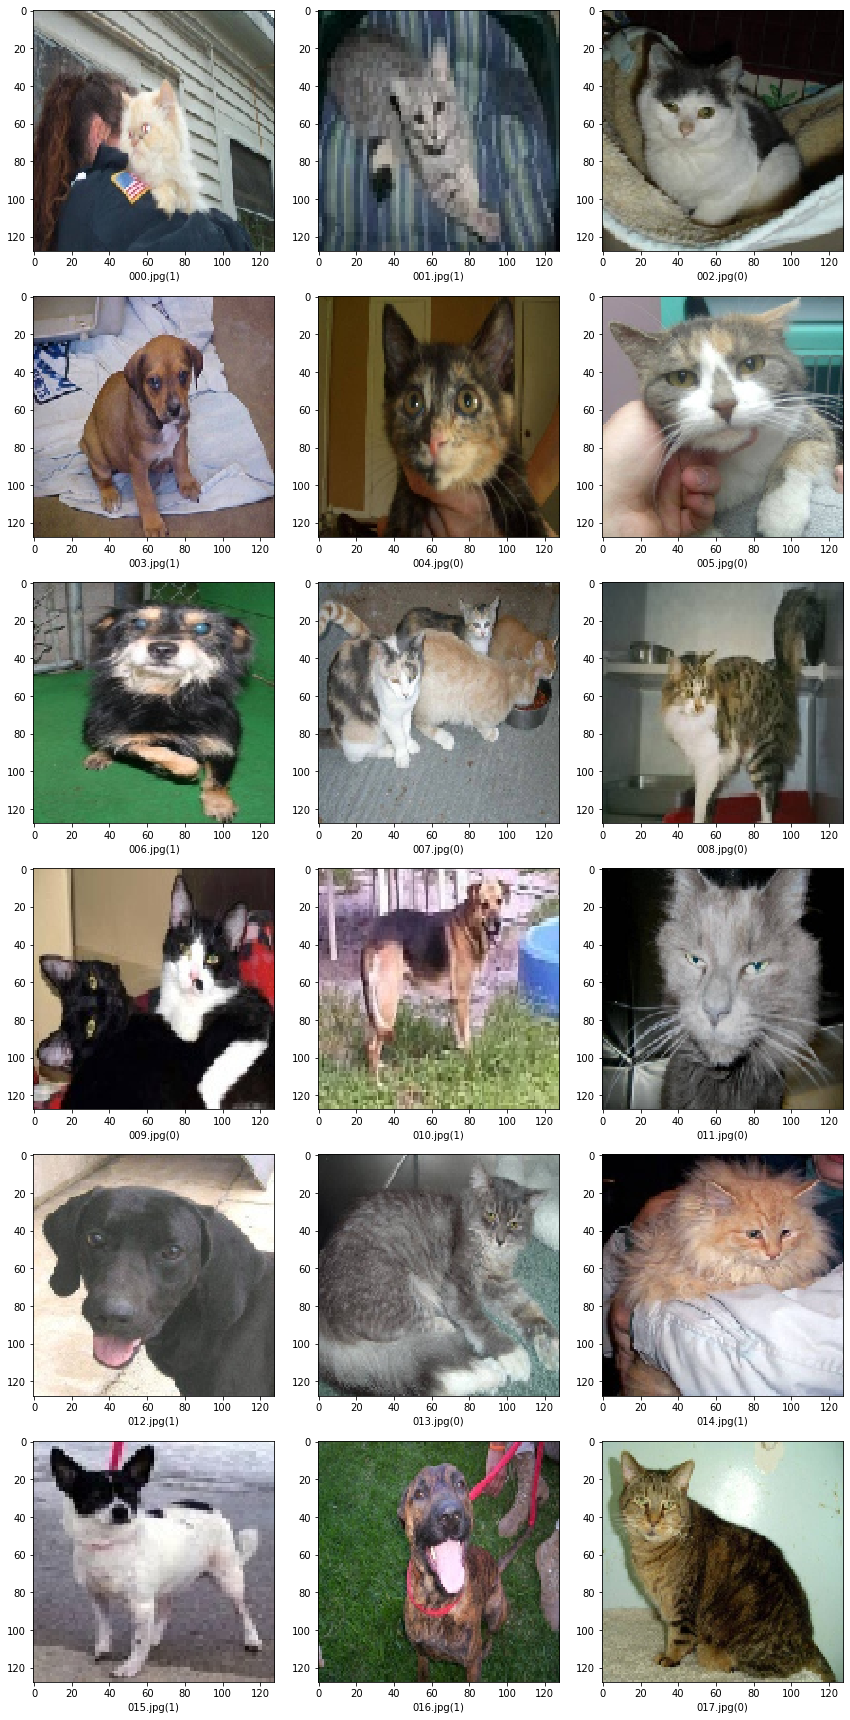

In [25]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("input/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()


In [26]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['Predicted'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('081301submission.csv', index=False)